In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\selva\HR-Employee-Attrition.csv")
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:ylabel='Attrition'>

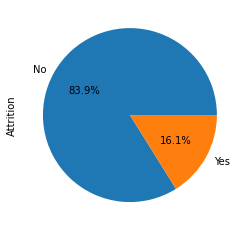

In [2]:
# The attrition Rate
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')

In [3]:
[{i:df[i].unique()} for i in df.columns]

[{'Age': array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
         24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
         58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)},
 {'Attrition': array(['Yes', 'No'], dtype=object)},
 {'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)},
 {'DailyRate': array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
          153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
          419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
          895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
          721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
          515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
         1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
          193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
          669,  5

In [4]:
# Finding out the Attrition rate of the Employees depends upon the Years With Current Manager
Attr_CurrManagr=pd.concat([pd.DataFrame(df.groupby(['Attrition']).get_group('Yes')['YearsWithCurrManager'].value_counts().sort_index()).rename(columns={'YearsWithCurrManager':'Yes'}),
           pd.DataFrame(df.groupby(['Attrition']).get_group('No')['YearsWithCurrManager'].value_counts().sort_index()).rename(columns={'YearsWithCurrManager':'No'})],axis=1)
Attr_CurrManagr['YearswithCurrentManager']=Attr_CurrManagr.index
Attr_CurrManagr.index=[i for i in range(1,19)]
Attr_CurrManagr['Attrition_Per']=Attr_CurrManagr['Yes']/(Attr_CurrManagr['Yes']+Attr_CurrManagr['No'])
Attr_CurrManagr=Attr_CurrManagr.fillna(0).round(2)
Attr_CurrManagr

,Yes,No,YearswithCurrentManager,Attrition_Per
1,85.0,178,0,0.32
2,11.0,65,1,0.14
3,50.0,294,2,0.15
4,19.0,123,3,0.13
5,11.0,87,4,0.11
6,4.0,27,5,0.13
7,4.0,25,6,0.14
8,31.0,185,7,0.14
9,10.0,97,8,0.09
10,6.0,58,9,0.09


In [5]:
# Finding Out the Attrition Rate with the Percent Salary Hike
grp=df.groupby(['Attrition'])
Attr_Hike=pd.concat([pd.DataFrame(grp.get_group('Yes')['PercentSalaryHike'].value_counts()).sort_index().rename(columns={'PercentSalaryHike':'Yes'}),
                    pd.DataFrame(grp.get_group('No')['PercentSalaryHike'].value_counts()).sort_index().rename(columns={'PercentSalaryHike':'No'})],axis=1)
Attr_Hike['PercentHike']=Attr_Hike.index
Attr_Hike.index=[i for i in range(1,Attr_Hike.shape[0]+1)]
Attr_Hike['Attr_per_Yes']=Attr_Hike['Yes']/(Attr_Hike['Yes']+Attr_Hike['No'])
Attr_Hike['Attr_per_No']=Attr_Hike['No']/(Attr_Hike['Yes']+Attr_Hike['No'])
Attr_Hike=Attr_Hike.round(2)
Attr_Hike

,Yes,No,PercentHike,Attr_per_Yes,Attr_per_No
1,41,169,11,0.20,0.80
2,33,165,12,0.17,0.83
3,34,175,13,0.16,0.84
4,24,177,14,0.12,0.88
5,18,83,15,0.18,0.82
6,14,64,16,0.18,0.82
7,14,68,17,0.17,0.83
8,13,76,18,0.15,0.85
9,9,67,19,0.12,0.88
10,7,48,20,0.13,0.87


Attrition         No  Yes  Attr_per_Yes  Attr_per_No
WorkLifeBalance                                     
1                 55   25          0.31         0.69
2                286   58          0.17         0.83
3                766  127          0.14         0.86
4                126   27          0.18         0.82


<AxesSubplot:ylabel='WorkLifeBalance'>

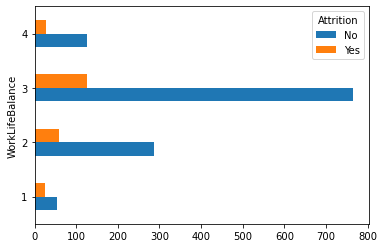

In [6]:
# Work Life Balance 
Wrklife=pd.crosstab(df['Attrition'],df['WorkLifeBalance'],df['TotalWorkingYears'],aggfunc='count').T
Wrklife['Attr_per_Yes']=Wrklife['Yes']/(Wrklife['Yes']+Wrklife['No'])
Wrklife['Attr_per_No']=Wrklife['No']/(Wrklife['Yes']+Wrklife['No'])
Wrklife=Wrklife.round(2)
print(Wrklife)
Wrklife.iloc[:,:2].plot.barh()

In [7]:
# Transforming Target Variable into Binary Classification
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder,OneHotEncoder
df['Attrition']=LabelBinarizer().fit_transform(df['Attrition'])
df['Gender']=LabelBinarizer().fit_transform(df['Gender'])
df['OverTime']=LabelBinarizer().fit_transform(df['OverTime'])

In [8]:
df['BusinessTravel']=df['BusinessTravel'].str.replace('Non-Travel','Travel_Not')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
df['BusinessTravel']=df['BusinessTravel'].str.split('Travel_',expand=True)[1]

In [10]:
df['BusinessTravel']=pd.DataFrame(OrdinalEncoder().fit_transform(df['BusinessTravel'].values[:,np.newaxis]))
df['MaritalStatus']=pd.DataFrame(OrdinalEncoder().fit_transform(df['MaritalStatus'].values[:,np.newaxis]))
df['Department']=pd.DataFrame(OrdinalEncoder().fit_transform(df['Department'].values[:,np.newaxis]))

In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,0.0,279,1.0,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,0.0,1392,1.0,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0.0,884,1.0,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,0.0,1023,2.0,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
ml=df.copy()
ml=ml.drop(['EducationField','EmployeeCount','EmployeeNumber','StandardHours'],axis=1)
ml

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,0.0,279,1.0,8,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,0.0,1392,1.0,3,4,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0.0,884,1.0,23,2,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,0.0,1023,2.0,2,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [13]:
ml.drop(['JobRole','Over18'],axis=1,inplace=True)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import confusion_matrix,f1_score,plot_roc_curve,brier_score_loss,accuracy_score
X=ml.drop(['Attrition'],axis=1)
y=ml['Attrition']
skf=StratifiedKFold(n_splits=2)
mod=LogisticRegression(max_iter=200)
sv_model=SVC()
dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier()


LogisticRegression(max_iter=200) 0.07017543859649122 0.8559782608695652
[[313   7]
 [ 46   2]]
SVC() 0.0 0.8695652173913043
[[320   0]
 [ 48   0]]
DecisionTreeClassifier() 0.30927835051546393 0.8179347826086957
[[286  34]
 [ 33  15]]
RandomForestClassifier() 0.10909090909090909 0.8668478260869565
[[316   4]
 [ 45   3]]


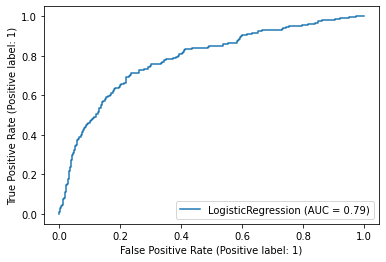

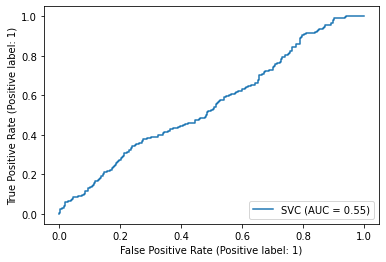

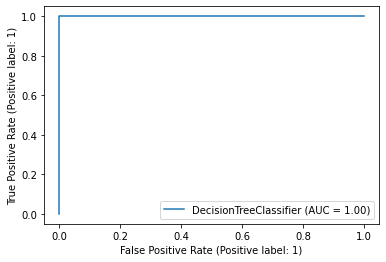

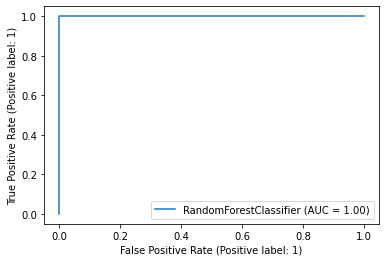

In [15]:
import warnings
warnings.filterwarnings('ignore')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
for i in [mod,sv_model,dtree,rfc]:
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(i,f1_score(y_test,y_pred),accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(plot_roc_curve(i,X_train,y_train))